# Logistic Regression
## Introduction
Linear regression is commonly used to model the relationship between quantitative variables. In other words, they are continuous, in that they feature a range of values. But often times, we are faced withy situations where our variables are no longer quantitative. Consider the following example:

Text(0, 0.5, 'Approval')

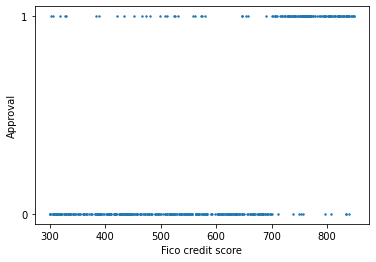

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import math

# Create a simple dataset consisting of credit scores and approval
fico_scores = []
approval = []
for i in range(500):
    fico = random.randint(300,850)
    fico_scores.append(fico)
    if fico > 700:
        probability = random.uniform(0,1)
        if probability > 0.1:  
            approval.append(1)
        else:
            approval.append(0)
    else:
        probability = random.uniform(0,1)
        if probability > 0.1:  
            approval.append(0)
        else:
            approval.append(1)
        
# Plot the data        
fig, ax = plt.subplots()        
ax.scatter(fico_scores, approval, s=2)
ax.set_yticks([0, 1])
ax.set_xlabel("Fico credit score")
ax.set_ylabel("Approval")

## The problem
The above data represents a random assortment of credit scores, and a binary state of whether the applicant with said score was approved for a home loan or not. In this situation, our dependent variable is **dichotomous and categorical**; it only has one of two states. 1 for approved, and 0 for not approved. How do we model this data, such that when we have a fico score, we can predict its categorization as either approved or not approved? 

## Using probabilities
Since we can't construct a model that directly maps to our binary output, we instead are motivated to think of this model as a probability model. In other words, construct a curve, which when given some input (in this case fico credit scores) will return a **probability** that the applicant was approved or not. In essence, we are trying to develop a model that (based on our data) can classify additional fico scores as probable/improbable for being approved for a loan. Thinking about our model in this way  is advantageous because:

* We can now map a quantitative variable (fico score) to a quantitative value (probability between 0 and 1)
* We can use the probability model to draw decision boundaries in the data
* It gives us a framework to optimize the data to a continuous probability function. We elaborate on this function in the next section

## The sigmoid function
The sigmoid function is a great candidate to help us construct this probability model. It is defined as
### $ y = \frac{1}{1 + e^{-\beta x}} $
Here. $\beta$ is a coefficient, and x is our independent variable ranging from -$\infty$ to +$\infty$. Let's have a quick look at it.


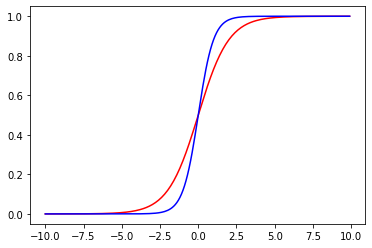

In [2]:
x = np.arange(-10,10, 0.1)
b1 = 1
b2 = 2
sigmoid_b1 = 1 / (1 + (math.e**(-b1*x)))
sigmoid_b2 = 1 / (1 + (math.e**(-b2*x)))
plt.plot(x,sigmoid_b1, color="red")
plt.plot(x,sigmoid_b2, color = "blue")

## Motivation of the sigmoid function, and maximum likelihood
The sigmoid function scales between 0 and 1, for any arbitrary input x. What makes the sigmoid curve so powerful, is that **it can be used to return a probability given any linear combination of variables as an input.** In our 1 dimensional case, we can input any scaled value of x, and a value between 0 and 1 is returned. Notice that we can change the coefficient in front of x to change the shape of the sigmoid curve.

Now that we have this function, what is the metric we need to use to 'best fit the data?' In linear regression, we aim to minimize the mean square error. In logistic regression, the analog takes the form of maximizing the **data's likelihood**. Put simply, **given some probability distribution defined using the sigma function and the $\beta$ coefficient, we would like to maximize the probability that our data belongs to this distribution.**

 *Our hope, is that we can find some coefficient $\beta$ such that the probability of the data is maximized.* We want to maximize: 
 
### $P(Data~|~Distribution)~ = ~P(y_{i}~|~x_{i}, \beta)$ for all i data points
$y_{i}$ is the probability that the given data point belongs to one of two classes (approved = 1, not = 0), while, $ x_{i}, \beta $ define this probability through a probability distribution in the form of a sigmoid function. The probability that data point *i* will be approved is computed as: 

### $ P(y_{i}~=~(either~1~or~0)|~x_{i}, \beta)~=~(~\frac{1}{1 + e^{-\beta x_{i}}}~)^{y_{i}}~(1 - ((~\frac{1}{1 + e^{-\beta x_{i}}}~))^{1 - y_{i}} $
When $y_{i}$ has a classification of 1, the equation nullifies the second term, and we calculate the probability of that classification. The same happens for when $y_{i}$ is classified to zero, the first term nullifies and we compute the probability using the second term. Keep in mind that this works for binary classification since the probability of one class is just 1 - the probability of the second class. The equation described above becomes our metric for determining how good of a fit our sigmoid function is. 

### Function to optimize F = $\prod_{n=0}^{i}~P(y_{i}~|~x_{i}, \beta)$
Much like we did in linear regression, all we need to do now is derive the gradient of this loss function, and use this gradient to update our $\beta$ variable such that we can maximize the likelihood using gradient descent. 

To simplify notation, we use the sigmoid notation as follows from this point onward: 
### $\sigma(x_{i},\beta)~=~(~\frac{1}{1 + e^{-\beta x_{i}}}~)$

## Computing the gradient of the function
Working with products and exponents tends to get complicated quite quickly, so often it is easier to take the natural log of the loss expression and use that to derive the gradient expression. We call this our *Loss function.* 

### Loss = $ln~(~\prod_{n=0}^{i}~P(y_{i}~|~x_{i}, \beta)~)~=~ln~(~\prod_{n=0}^{i}~\sigma(x_{i}, \beta)^{y_{i}}~(1- \sigma(x_{i}, \beta)^{1 - y_{i}})~)$

The natural log converts the product to a sum, and allows the sigmoid function to simplify: 


### Loss = $\sum_{n=0}^{i}~~(~~y_{i}~ln(\sigma(x_{i}, \beta))~+~(1 - y_{i})~ln(1 - \sigma(x_{i}, \beta))~~)~~$

Taking the partial derivative of this expression with respect to $\beta$ yields the final gradient expression: 

One way of visualizing this is to convert the probability axis (the y axis in the sigmoid function) to a **log odds axis. (i.e plot ln(probability / 1-probability) in place of p).** This transforms our graph into a straight line:

In [3]:
# Log odds
p = 1 / (1 + (math.e**(-b1*x)))
log_odds = np.log(p / (1-p))

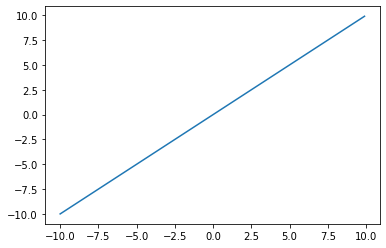

In [81]:
plt.plot(x, log_odds)

We should keep in mind, that the *odds* of an event event/classification is simply equal to 

### $\frac{P~(occuring)}{P~(not ~ occuring)}$ 

Great! Now that we've transformed our feature space into a straight line, why can't we just use least squares? Unfortunately, the log odds transformation has a consequence of pushing our binary data classifications towards negative and positive infinity:

$ln~({\frac{0}{1-0}}) = -\infty$\
$ln~({\frac{1}{1-1}}) = \infty$

So instead what we do, is **project the data points onto the line instead**